In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm

In [ ]:
df = pd.read_csv("/content/data_banknote_authentication.txt")
df.head()

,3.6216,8.6661,-2.8073,-0.44699,0
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [ ]:
df["0"].unique()

array([0, 1])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371 entries, 0 to 1370
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   3.6216    1371 non-null   float64
 1   8.6661    1371 non-null   float64
 2   -2.8073   1371 non-null   float64
 3   -0.44699  1371 non-null   float64
 4   0         1371 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


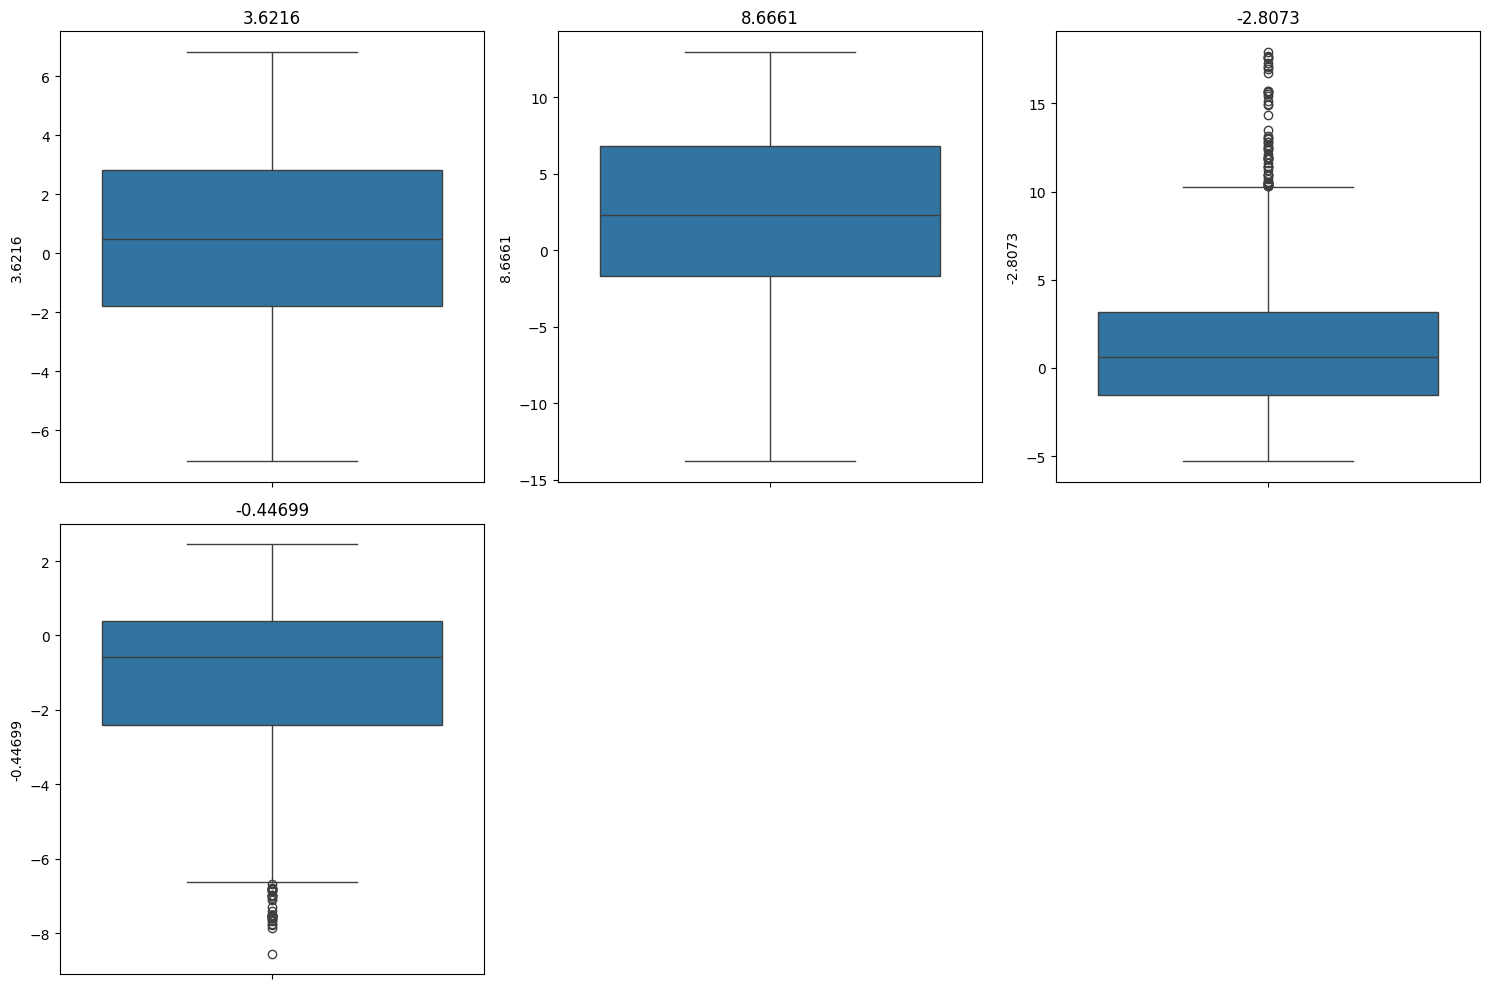

In [ ]:
numeric_columns = ["3.6216","8.6661","-2.8073","-0.44699"]
num_cols = len(numeric_columns)

num_rows = (num_cols // 3) + (num_cols % 3 > 0)

plt.figure(figsize=(15, num_rows * 5))

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()


In [ ]:
from scipy.stats import zscore

for col in numeric_columns:
    outliers = (abs(zscore(df[col].dropna())) > 3).sum()
    print(f'{col} Number of outliers: {outliers}')

3.6216 Number of outliers: 0
8.6661 Number of outliers: 0
-2.8073 Number of outliers: 20
-0.44699 Number of outliers: 16


In [ ]:
X = df.drop("0",axis=1)
y = df["0"]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
model = svm.SVC()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9963636363636363
Precision: 0.9921875
Recall: 1.0
F1 Score: 0.996078431372549
